In [18]:
pip install ucimlrepo

In [19]:
import pandas as pd
import numpy as np

In [20]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
credit_approval = fetch_ucirepo(id=27)

# data (as pandas dataframes)
X = credit_approval.data.features
y = credit_approval.data.targets

# metadata
print(credit_approval.metadata)

# variable information
print(credit_approval.variables)


{'uci_id': 27, 'name': 'Credit Approval', 'repository_url': 'https://archive.ics.uci.edu/dataset/27/credit+approval', 'data_url': 'https://archive.ics.uci.edu/static/public/27/data.csv', 'abstract': 'This data concerns credit card applications; good mix of attributes', 'area': 'Business', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 690, 'num_features': 15, 'feature_types': ['Categorical', 'Integer', 'Real'], 'demographics': [], 'target_col': ['A16'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1987, 'last_updated': 'Wed Aug 23 2023', 'dataset_doi': '10.24432/C5FS30', 'creators': ['J. R. Quinlan'], 'intro_paper': None, 'additional_info': {'summary': 'This file concerns credit card applications.  All attribute names and values have been changed to meaningless symbols to protect confidentiality of the data.\r\n  \r\nThis dataset is interesting because there is a good mix of attributes --

In [21]:
#Displaying the feature and target variable values
print(X)
print(y)

     A15    A14 A13 A12  A11 A10 A9    A8  A7  A6 A5 A4      A3     A2 A1
0      0  202.0   g   f    1   t  t  1.25   v   w  g  u   0.000  30.83  b
1    560   43.0   g   f    6   t  t  3.04   h   q  g  u   4.460  58.67  a
2    824  280.0   g   f    0   f  t  1.50   h   q  g  u   0.500  24.50  a
3      3  100.0   g   t    5   t  t  3.75   v   w  g  u   1.540  27.83  b
4      0  120.0   s   f    0   f  t  1.71   v   w  g  u   5.625  20.17  b
..   ...    ...  ..  ..  ...  .. ..   ...  ..  .. .. ..     ...    ... ..
685    0  260.0   g   f    0   f  f  1.25   h   e  p  y  10.085  21.08  b
686  394  200.0   g   t    2   t  f  2.00   v   c  g  u   0.750  22.67  a
687    1  200.0   g   t    1   t  f  2.00  ff  ff  p  y  13.500  25.25  a
688  750  280.0   g   f    0   f  f  0.04   v  aa  g  u   0.205  17.92  b
689    0    0.0   g   t    0   f  f  8.29   h   c  g  u   3.375  35.00  b

[690 rows x 15 columns]
    A16
0     +
1     +
2     +
3     +
4     +
..   ..
685   -
686   -
687   -
688   -

In [22]:
# Reverse the order of columns in DataFrame X
X_reversed = X.iloc[:, ::-1]
print(X_reversed)

    A1     A2      A3 A4 A5  A6  A7    A8 A9 A10  A11 A12 A13    A14  A15
0    b  30.83   0.000  u  g   w   v  1.25  t   t    1   f   g  202.0    0
1    a  58.67   4.460  u  g   q   h  3.04  t   t    6   f   g   43.0  560
2    a  24.50   0.500  u  g   q   h  1.50  t   f    0   f   g  280.0  824
3    b  27.83   1.540  u  g   w   v  3.75  t   t    5   t   g  100.0    3
4    b  20.17   5.625  u  g   w   v  1.71  t   f    0   f   s  120.0    0
..  ..    ...     ... .. ..  ..  ..   ... ..  ..  ...  ..  ..    ...  ...
685  b  21.08  10.085  y  p   e   h  1.25  f   f    0   f   g  260.0    0
686  a  22.67   0.750  u  g   c   v  2.00  f   t    2   t   g  200.0  394
687  a  25.25  13.500  y  p  ff  ff  2.00  f   t    1   t   g  200.0    1
688  b  17.92   0.205  u  g  aa   v  0.04  f   f    0   f   g  280.0  750
689  b  35.00   3.375  u  g   c   h  8.29  f   f    0   t   g    0.0    0

[690 rows x 15 columns]


In [23]:
# Concatenate reversed X (features) and y (target variable) into a single DataFrame
dataframe = pd.concat([X_reversed, y], axis=1)

In [24]:
#Shape of the dataframe
dataframe.shape

(690, 16)

In [25]:
#Printing the head of the dataframe
dataframe.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,202.0,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,43.0,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,280.0,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,100.0,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,120.0,0,+


The dataset, obtained from the UCI machine learning repository with strict data confidentiality measures, has been anonymized to protect sensitive information. However, referencing the information available in the provided [blog](https://rstudio-pubs-static.s3.amazonaws.com/73039_9946de135c0a49daa7a0a9eda4a67a72.html), we can identify the specific variable names associated with the dataset. These variables include Gender, Age, Debt, Marital Status, Banking Customer Status, Education Level, Ethnicity, Years of Employment, Prior Default History, Employment Status, Credit Score, Driver's License Status, Citizenship, Zip Code, Income, and Approval Status.

In [26]:
#Changing the varible names into meaningful values
dataframe_cols = ['Gender', 'Age', 'Debt', 'MaritalStatus', 'BankCustomerStatus', 'EducationLevel', 'Ethnicity', 'YearsEmployed', 'PriorDefaultHistory', 'EmploymentStatus', 'CreditScore', 'DriversLicenseStatus','Citizen', 'ZipCode', 'Income', 'ApprovalStatus']
dataframe.columns = dataframe_cols

In [27]:
#Displaying the data after changing variable names
#Head
dataframe.head(25)

,Gender,Age,Debt,MaritalStatus,BankCustomerStatus,EducationLevel,Ethnicity,YearsEmployed,PriorDefaultHistory,EmploymentStatus,CreditScore,DriversLicenseStatus,Citizen,ZipCode,Income,ApprovalStatus
0,b,30.83,0.000,u,g,w,v,1.250,t,t,1,f,g,202.0,0,+
1,a,58.67,4.460,u,g,q,h,3.040,t,t,6,f,g,43.0,560,+
2,a,24.50,0.500,u,g,q,h,1.500,t,f,0,f,g,280.0,824,+
3,b,27.83,1.540,u,g,w,v,3.750,t,t,5,t,g,100.0,3,+
4,b,20.17,5.625,u,g,w,v,1.710,t,f,0,f,s,120.0,0,+
5,b,32.08,4.000,u,g,m,v,2.500,t,f,0,t,g,360.0,0,+
6,b,33.17,1.040,u,g,r,h,6.500,t,f,0,t,g,164.0,31285,+
7,a,22.92,11.585,u,g,cc,v,0.040,t,f,0,f,g,80.0,1349,+
8,b,54.42,0.500,y,p,k,h,3.960,t,f,0,f,g,180.0,314,+
9,b,42.50,4.915,y,p,w,v,3.165,t,f,0,t,g,52.0,1442,+


In [28]:
#Tail
dataframe.tail(25)

,Gender,Age,Debt,MaritalStatus,BankCustomerStatus,EducationLevel,Ethnicity,YearsEmployed,PriorDefaultHistory,EmploymentStatus,CreditScore,DriversLicenseStatus,Citizen,ZipCode,Income,ApprovalStatus
665,b,31.83,0.040,y,p,m,v,0.040,f,f,0,f,g,0.0,0,-
666,a,21.75,11.750,u,g,c,v,0.250,f,f,0,t,g,180.0,0,-
667,a,17.92,0.540,u,g,c,v,1.750,f,t,1,t,g,80.0,5,-
668,b,30.33,0.500,u,g,d,h,0.085,f,f,0,t,s,252.0,0,-
669,b,51.83,2.040,y,p,ff,ff,1.500,f,f,0,f,g,120.0,1,-
670,b,47.17,5.835,u,g,w,v,5.500,f,f,0,f,g,465.0,150,-
671,b,25.83,12.835,u,g,cc,v,0.500,f,f,0,f,g,0.0,2,-
672,a,50.25,0.835,u,g,aa,v,0.500,f,f,0,t,g,240.0,117,-
673,NaN,29.50,2.000,y,p,e,h,2.000,f,f,0,f,g,256.0,17,-
674,a,37.33,2.500,u,g,i,h,0.210,f,f,0,f,g,260.0,246,-


In [29]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Gender                678 non-null    object 
 1   Age                   678 non-null    float64
 2   Debt                  690 non-null    float64
 3   MaritalStatus         684 non-null    object 
 4   BankCustomerStatus    684 non-null    object 
 5   EducationLevel        681 non-null    object 
 6   Ethnicity             681 non-null    object 
 7   YearsEmployed         690 non-null    float64
 8   PriorDefaultHistory   690 non-null    object 
 9   EmploymentStatus      690 non-null    object 
 10  CreditScore           690 non-null    int64  
 11  DriversLicenseStatus  690 non-null    object 
 12  Citizen               690 non-null    object 
 13  ZipCode               677 non-null    float64
 14  Income                690 non-null    int64  
 15  ApprovalStatus        6

In [30]:
dataframe.describe(include = 'all')

,Gender,Age,Debt,MaritalStatus,BankCustomerStatus,EducationLevel,Ethnicity,YearsEmployed,PriorDefaultHistory,EmploymentStatus,CreditScore,DriversLicenseStatus,Citizen,ZipCode,Income,ApprovalStatus
count,678,678.000000,690.000000,684,684,681,681,690.000000,690,690,690.00000,690,690,677.000000,690.000000,690
unique,2,NaN,NaN,3,3,14,9,NaN,2,2,NaN,2,3,NaN,NaN,2
top,b,NaN,NaN,u,g,c,v,NaN,t,f,NaN,f,g,NaN,NaN,-
freq,468,NaN,NaN,519,519,137,399,NaN,361,395,NaN,374,625,NaN,NaN,383
mean,NaN,31.568171,4.758725,NaN,NaN,NaN,NaN,2.223406,NaN,NaN,2.40000,NaN,NaN,184.014771,1017.385507,NaN
std,NaN,11.957862,4.978163,NaN,NaN,NaN,NaN,3.346513,NaN,NaN,4.86294,NaN,NaN,173.806768,5210.102598,NaN
min,NaN,13.750000,0.000000,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,0.00000,NaN,NaN,0.000000,0.000000,NaN
25%,NaN,22.602500,1.000000,NaN,NaN,NaN,NaN,0.165000,NaN,NaN,0.00000,NaN,NaN,75.000000,0.000000,NaN
50%,NaN,28.460000,2.750000,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,0.00000,NaN,NaN,160.000000,5.000000,NaN
75%,NaN,38.230000,7.207500,NaN,NaN,NaN,NaN,2.625000,NaN,NaN,3.00000,NaN,NaN,276.000000,395.500000,NaN


In [31]:
# Dealing with the missing values
data = dataframe.fillna(dataframe.mean())

# Check if there are any missing values left
print(data.isnull().sum())

Gender                  12
Age                      0
Debt                     0
MaritalStatus            6
BankCustomerStatus       6
EducationLevel           9
Ethnicity                9
YearsEmployed            0
PriorDefaultHistory      0
EmploymentStatus         0
CreditScore              0
DriversLicenseStatus     0
Citizen                  0
ZipCode                  0
Income                   0
ApprovalStatus           0
dtype: int64


<ipython-input-31-44402bcbb925>:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data = dataframe.fillna(dataframe.mean())


In [32]:
# Filling missing values with mode for categorical variables
data['Gender'] = data['Gender'].fillna(data['Gender'].mode()[0])
data['MaritalStatus'] = data['MaritalStatus'].fillna(data['MaritalStatus'].mode()[0])
data['BankCustomerStatus'] = data['BankCustomerStatus'].fillna(data['BankCustomerStatus'].mode()[0])
data['EducationLevel'] = data['EducationLevel'].fillna(data['EducationLevel'].mode()[0])
data['Ethnicity'] = data['Ethnicity'].fillna(data['Ethnicity'].mode()[0])

# Check if there are any missing values left
print(data.isnull().sum())

Gender                  0
Age                     0
Debt                    0
MaritalStatus           0
BankCustomerStatus      0
EducationLevel          0
Ethnicity               0
YearsEmployed           0
PriorDefaultHistory     0
EmploymentStatus        0
CreditScore             0
DriversLicenseStatus    0
Citizen                 0
ZipCode                 0
Income                  0
ApprovalStatus          0
dtype: int64


In [33]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
lbl_en = LabelEncoder()

for col in data.columns:
    if data[col].dtypes=='object':
        data[col]=lbl_en.fit_transform(data[col])

#Displaying the head
data.head()

,Gender,Age,Debt,MaritalStatus,BankCustomerStatus,EducationLevel,Ethnicity,YearsEmployed,PriorDefaultHistory,EmploymentStatus,CreditScore,DriversLicenseStatus,Citizen,ZipCode,Income,ApprovalStatus
0,1,30.83,0.000,1,0,12,7,1.25,1,1,1,0,0,202.0,0,0
1,0,58.67,4.460,1,0,10,3,3.04,1,1,6,0,0,43.0,560,0
2,0,24.50,0.500,1,0,10,3,1.50,1,0,0,0,0,280.0,824,0
3,1,27.83,1.540,1,0,12,7,3.75,1,1,5,1,0,100.0,3,0
4,1,20.17,5.625,1,0,12,7,1.71,1,0,0,0,2,120.0,0,0


Number of outliers before handling: 303
Number of outliers after handling: 0


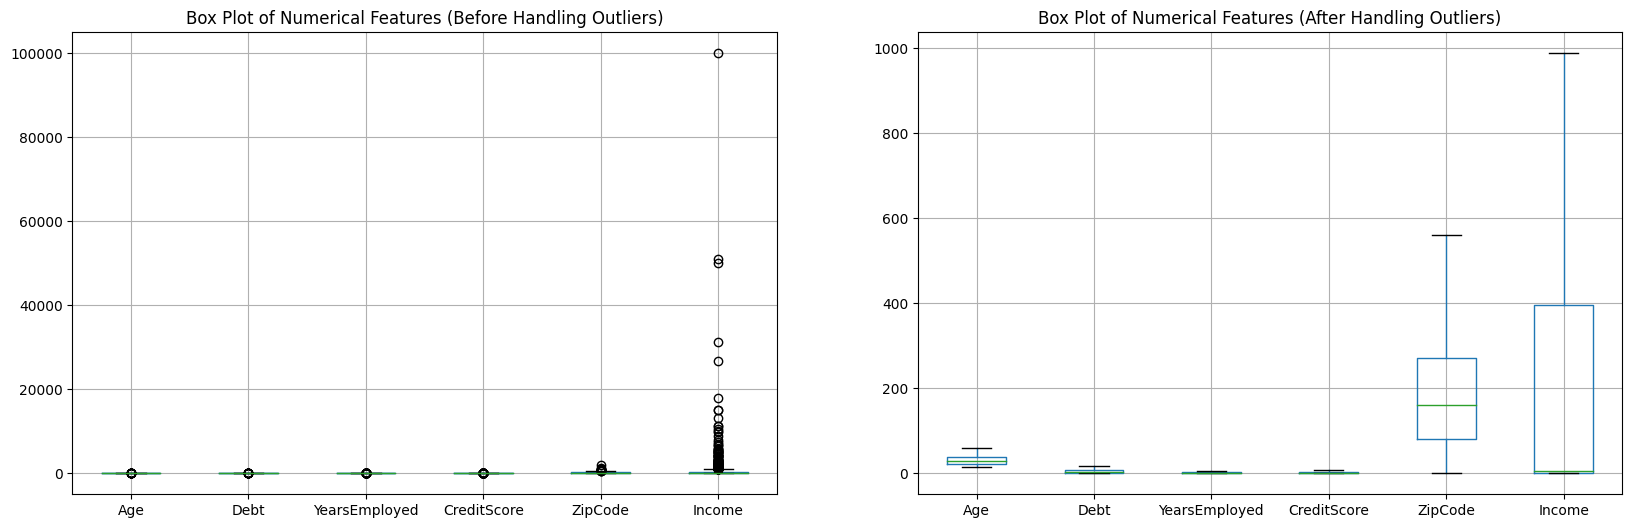

In [44]:
import pandas as pd
import matplotlib.pyplot as plt

# Define a function to handle outliers by capping them to lower and upper bounds
def handle_outliers(series):
    # Calculate Q1 (25th percentile) and Q3 (75th percentile)
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)

    # Calculate IQR (Interquartile Range)
    IQR = Q3 - Q1

    # Find lower and upper bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Cap outliers to lower and upper bounds
    series = series.clip(lower=lower_bound, upper=upper_bound)

    return series

# Select numerical columns for outlier detection and handling
numerical_columns = ['Age', 'Debt', 'YearsEmployed', 'CreditScore', 'ZipCode', 'Income']

# Count outliers before handling
outliers_before = (data[numerical_columns] < data[numerical_columns].quantile(0.25) - 1.5 * (data[numerical_columns].quantile(0.75) - data[numerical_columns].quantile(0.25))) | (data[numerical_columns] > data[numerical_columns].quantile(0.75) + 1.5 * (data[numerical_columns].quantile(0.75) - data[numerical_columns].quantile(0.25)))
num_outliers_before = outliers_before.sum().sum()

# Handle outliers by capping them to lower and upper bounds
data_outliers_handled = data.copy()  # Create a copy of the original DataFrame
for column in numerical_columns:
    data_outliers_handled[column] = handle_outliers(data[column])

# Count outliers after handling
outliers_after = (data_outliers_handled[numerical_columns] < data_outliers_handled[numerical_columns].quantile(0.25) - 1.5 * (data_outliers_handled[numerical_columns].quantile(0.75) - data_outliers_handled[numerical_columns].quantile(0.25))) | (data_outliers_handled[numerical_columns] > data_outliers_handled[numerical_columns].quantile(0.75) + 1.5 * (data_outliers_handled[numerical_columns].quantile(0.75) - data_outliers_handled[numerical_columns].quantile(0.25)))
num_outliers_after = outliers_after.sum().sum()

# Print the number of outliers before and after handling
print("Number of outliers before handling:", num_outliers_before)
print("Number of outliers after handling:", num_outliers_after)

# Visualize outliers using box plots
plt.figure(figsize=(20, 6))
plt.subplot(1, 2, 1)
data[numerical_columns].boxplot()
plt.title('Box Plot of Numerical Features (Before Handling Outliers)')
plt.subplot(1, 2, 2)
data_outliers_handled[numerical_columns].boxplot()
plt.title('Box Plot of Numerical Features (After Handling Outliers)')
plt.show()


In [51]:
from sklearn.model_selection import train_test_split

# Split the data into features (X) and target variable (y)
X = data_outliers_handled.drop(columns=['ApprovalStatus'])  # Features
y = data_outliers_handled['ApprovalStatus']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the training and testing sets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (552, 15)
X_test shape: (138, 15)
y_train shape: (552,)
y_test shape: (138,)


In [53]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit the scaler on the training data and transform both training and testing data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert the scaled arrays back to DataFrames
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test.columns)

# Print the scaled training and testing data
print("Scaled Training Data:")
print(X_train_scaled_df.head())
print("\nScaled Testing Data:")
print(X_test_scaled_df.head())


Scaled Training Data:
   Gender       Age      Debt  MaritalStatus  BankCustomerStatus  \
0     1.0  0.232834  0.817253            1.0                 1.0   
1     1.0  0.331515  0.211880            0.5                 0.0   
2     1.0  0.560694  0.030269            0.5                 0.0   
3     1.0  0.263363  0.060537            0.5                 0.0   
4     1.0  0.863616  0.582671            0.5                 0.0   

   EducationLevel  Ethnicity  YearsEmployed  PriorDefaultHistory  \
0        0.384615      0.250       0.000000                  0.0   
1        0.923077      0.875       0.554236                  1.0   
2        0.692308      0.875       0.039588                  1.0   
3        0.769231      0.875       0.277118                  1.0   
4        0.307692      0.875       1.000000                  1.0   

   EmploymentStatus  CreditScore  DriversLicenseStatus  Citizen   ZipCode  \
0               0.0     0.000000                   0.0      0.0  0.328598   
1     

In [58]:
from sklearn.metrics import accuracy_score, confusion_matrix

# Initialize the Logistic Regression model
logistic_regression_model = LogisticRegression()

# Train the model on the scaled training data
logistic_regression_model.fit(X_train_scaled, y_train)

# Predict the target variable on the scaled testing data
y_pred = logistic_regression_model.predict(X_test_scaled)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Print the accuracy
print("Accuracy:", accuracy)

# Print the confusion matrix
print("\nConfusion Matrix:")
print(conf_matrix)


Accuracy: 0.8405797101449275

Confusion Matrix:
[[61  9]
 [13 55]]


In [60]:
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

# Hyperparameter Tuning using Grid Search
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}  # Example grid of hyperparameters
grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5)
grid_search.fit(X_train_scaled, y_train)
best_params = grid_search.best_params_

# Feature Selection using Recursive Feature Elimination (RFE)
logistic_regression_model = LogisticRegression(C=best_params['C'])  # Using best hyperparameters from grid search
rfe = RFE(logistic_regression_model, n_features_to_select=10)  # Example: Selecting top 10 features
rfe.fit(X_train_scaled, y_train)
selected_features = [i for i, x in enumerate(rfe.support_) if x]

# Train Logistic Regression model with selected features
logistic_regression_model.fit(X_train_scaled[:, selected_features], y_train)

# Predictions on test set
y_pred = logistic_regression_model.predict(X_test_scaled[:, selected_features])

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

print("Best Hyperparameters:", best_params)
print("Selected Features:", selected_features)
print("\nAccuracy:", accuracy)
print("\nConfusion Matrix:")
print(conf_matrix)


Best Hyperparameters: {'C': 0.1}
Selected Features: [1, 2, 3, 4, 5, 7, 8, 9, 10, 14]

Accuracy: 0.8188405797101449

Confusion Matrix:
[[56 14]
 [11 57]]


In [61]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.linear_model import LogisticRegression

# Define logistic regression model
logistic_regression_model = LogisticRegression(C=0.1)  # Use the best hyperparameters found previously

# Define cross-validation strategy
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation
cross_val_scores = cross_val_score(logistic_regression_model, X_train_scaled[:, selected_features], y_train, cv=cv, scoring='accuracy')

# Print cross-validation scores
print("Cross-Validation Scores:", cross_val_scores)
print("Mean Accuracy:", cross_val_scores.mean())


Cross-Validation Scores: [0.90990991 0.83783784 0.88181818 0.92727273 0.82727273]
Mean Accuracy: 0.8768222768222769


In [68]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve

# Train Set Evaluation Metrics
y_train_pred = logistic_regression_model.predict(X_train_scaled[:, selected_features])

train_accuracy = accuracy_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred)
train_recall = recall_score(y_train, y_train_pred)
train_f1_score = f1_score(y_train, y_train_pred)
train_roc_auc = roc_auc_score(y_train, y_train_pred)

# Test Set Evaluation Metrics
y_test_pred = logistic_regression_model.predict(X_test_scaled[:, selected_features])

test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_f1_score = f1_score(y_test, y_test_pred)
test_roc_auc = roc_auc_score(y_test, y_test_pred)

print("Train Set Evaluation Metrics:")
print("Accuracy:", train_accuracy)
print("Precision:", train_precision)
print("Recall:", train_recall)
print("F1 Score:", train_f1_score)
print("ROC AUC Score:", train_roc_auc)

print("\nTest Set Evaluation Metrics:")
print("Accuracy:", test_accuracy)
print("Precision:", test_precision)
print("Recall:", test_recall)
print("F1 Score:", test_f1_score)
print("ROC AUC Score:", test_roc_auc)


Train Set Evaluation Metrics:
Accuracy: 0.8786231884057971
Precision: 0.9025974025974026
Recall: 0.8825396825396825
F1 Score: 0.8924558587479936
ROC AUC Score: 0.8779787020293349

Test Set Evaluation Metrics:
Accuracy: 0.8188405797101449
Precision: 0.8028169014084507
Recall: 0.8382352941176471
F1 Score: 0.8201438848920864
ROC AUC Score: 0.8191176470588236


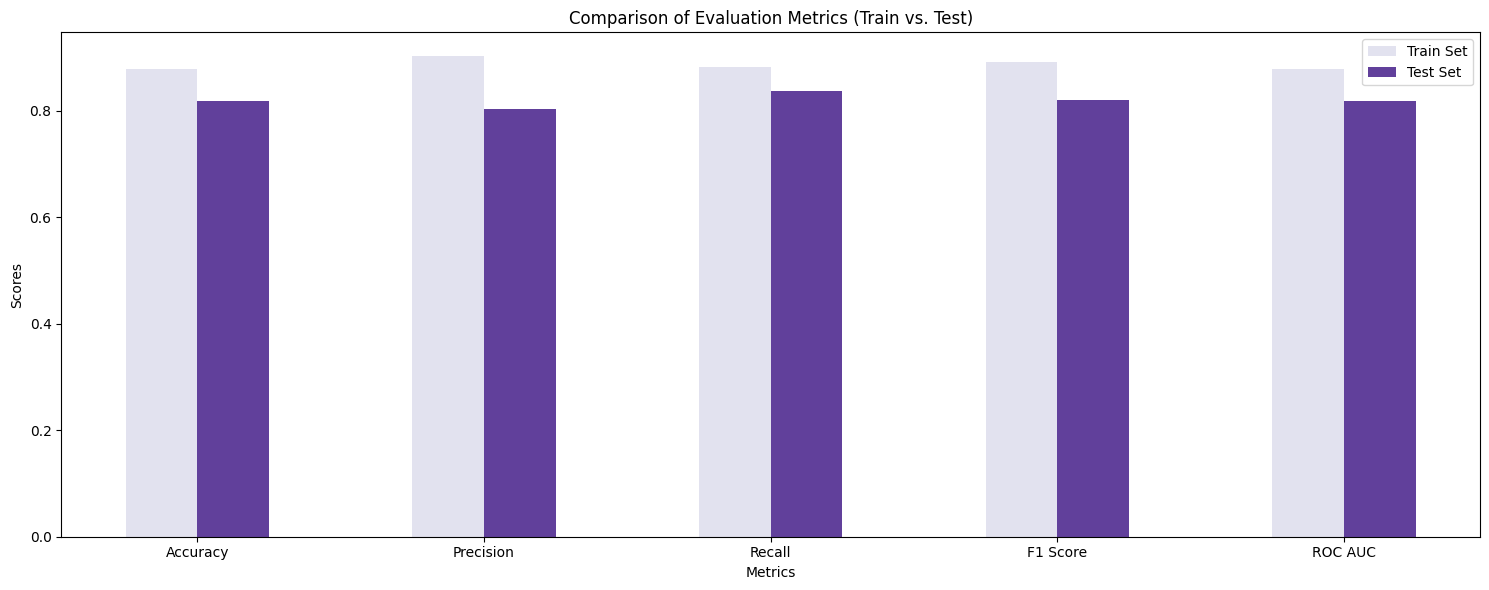

In [73]:
import matplotlib.pyplot as plt
import numpy as np

# Evaluation Metric Names
metric_names = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC AUC']

# Train Set Metrics
train_metrics = [train_accuracy, train_precision, train_recall, train_f1_score, train_roc_auc]

# Test Set Metrics
test_metrics = [test_accuracy, test_precision, test_recall, test_f1_score, test_roc_auc]

# Number of Evaluation Metrics
num_metrics = len(metric_names)

# Create figure and axes
fig, ax = plt.subplots(figsize=(15, 6))

# Set bar width
bar_width = 0.25

# Set index for the metrics
index = np.arange(num_metrics)

# Define colors
colors = plt.cm.Purples(np.linspace(0.2, 0.8, 2))  # Shades of purple

# Plot train metrics
train_bars = ax.bar(index, train_metrics, bar_width, color=colors[0], label='Train Set')

# Plot test metrics
test_bars = ax.bar(index + bar_width, test_metrics, bar_width, color=colors[1], label='Test Set')

# Set labels, title, and legend
ax.set_xlabel('Metrics')
ax.set_ylabel('Scores')
ax.set_title('Comparison of Evaluation Metrics (Train vs. Test)')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(metric_names)
ax.legend()

# Show plot
plt.tight_layout()
plt.show()
